In [137]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import numpy as np

In [138]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

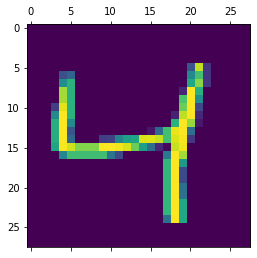

In [139]:
plt.matshow(x_train[2])

In [140]:
x_train.shape

(60000, 28, 28)

In [141]:
x_train=x_train/255
x_test=x_test/255

In [142]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [143]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [144]:
x_test.shape

(10000, 28, 28)

In [163]:
model=keras.Sequential([
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2109 - accuracy: 0.9382: 0s - loss: 0.2114 - accuracy: 0.93
Epoch 2/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.97 - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9750
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0585 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0447 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0335 - accuracy: 0.9889


In [164]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0729 - accuracy: 0.9801


[0.07291930913925171, 0.9800999760627747]

In [165]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

array([7.3092781e-09, 2.4129224e-07, 6.2119478e-05, 1.5862892e-05,
       5.5762919e-13, 6.7548609e-07, 1.8662580e-12, 9.1444623e-01,
       1.0831013e-07, 7.0551514e-06], dtype=float32)

In [166]:
np.argmax(y_predicted[0])

7

In [167]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:6]

[7, 2, 1, 0, 4, 1]

In [169]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth Values')

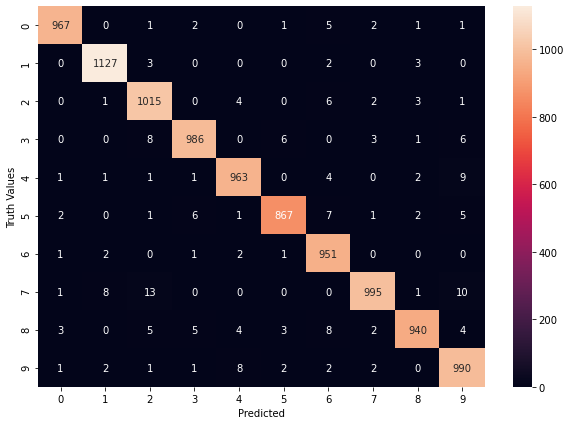

In [170]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth Values")